 Classes in 'C:\Users\vijay_380drwx\Downloads\First Notebook\Train': ['Cats', 'Dogs']
 Classes in 'C:\Users\vijay_380drwx\Downloads\First Notebook\Test': ['Cats', 'Dogs']

 Training Data Shape: (42, 12288)

 Testing Data Shape: (42, 12288)

 Class Labels: ['Cats' 'Dogs']
 PCA Components Selected: 42
 PCA Applied. New Training Shape: (42, 42)

 Accuracy: 50.00%

 Classification Report:

              precision    recall  f1-score   support

        Cats       0.50      0.38      0.43        21
        Dogs       0.50      0.62      0.55        21

    accuracy                           0.50        42
   macro avg       0.50      0.50      0.49        42
weighted avg       0.50      0.50      0.49        42



<Figure size 600x500 with 0 Axes>

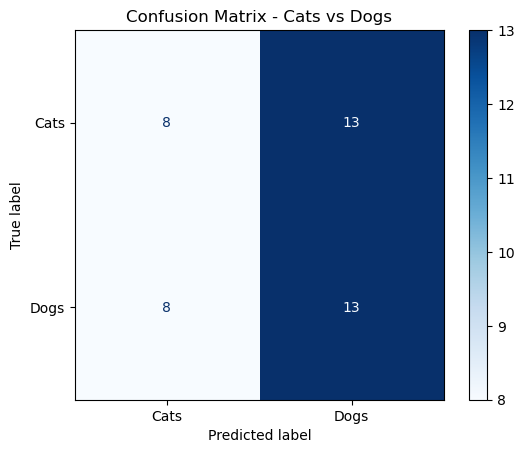

In [8]:

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array



def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []

    class_folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]

    if not class_folders:
        raise ValueError(f" No class folders found in {folder}. Check folder structure.")

    print(f" Classes in '{folder}': {class_folders}")

    for label in class_folders:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                images.append(img_array.flatten())
                labels.append(label)
            except Exception as e:
                print(f" Error loading {img_path}: {e}")

    return np.array(images, dtype=np.float64), np.array(labels)



train_folder = r'C:\Users\vijay_380drwx\Downloads\First Notebook\Train'
test_folder = r'C:\Users\vijay_380drwx\Downloads\First Notebook\Test'


X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

print(f"\n Training Data Shape: {X_train.shape}")
print(f"\n Testing Data Shape: {X_test.shape}")


if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError(" One of the datasets is empty. Check folder paths and images.")


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("\n Class Labels:", le.classes_)
n_components = min(100, X_train.shape[0], X_train.shape[1])
print(f" PCA Components Selected: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f" PCA Applied. New Training Shape: {X_train_pca.shape}")

model = svm.SVC(kernel='linear')
model.fit(X_train_pca, y_train_encoded)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"\n Accuracy: {accuracy * 100:.2f}%")
print("\n Classification Report:\n")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Cats vs Dogs")
plt.show()
